<a href="https://colab.research.google.com/github/Sathya-242006/BUYING-AND-SELLING/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTING HOUSE PRICE USING REGRESSION MODEL

Mean Squared Error: 131978030.9285385
R2 Score: 0.9248226406103262


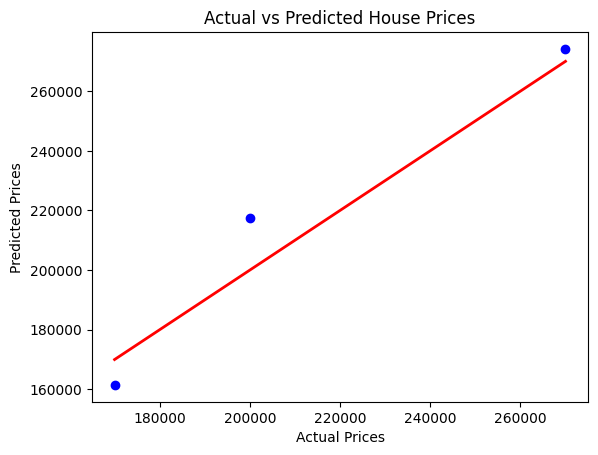

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = {
    "Rooms": [2, 3, 4, 3, 5, 4, 6, 2, 3, 4],
    "Area": [800, 1200, 1500, 1100, 2000, 1600, 2500, 700, 1000, 1400],
    "Age": [10, 5, 2, 8, 1, 4, 3, 12, 9, 6],
    "Price": [150000, 200000, 250000, 180000, 350000, 270000, 400000, 120000, 170000, 230000]
}
df = pd.DataFrame(data)
X = df[["Rooms", "Area", "Age"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 145s 404ms/step - accuracy: 0.6546 - loss: 0.5963 - val_accuracy: 0.8508 - val_loss: 0.3504
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 143s 406ms/step - accuracy: 0.8836 - loss: 0.2970 - val_accuracy: 0.8536 - val_loss: 0.3224
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 143s 407ms/step - accuracy: 0.9021 - loss: 0.2474 - val_accuracy: 0.8624 - val_loss: 0.3144
Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 271s 756ms/step - accuracy: 0.6968 - loss: 0.5592 - val_accuracy: 0.8028 - val_loss: 0.4391
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 321s 753ms/step - accuracy: 0.8608 - loss: 0.3420 - val_accuracy: 0.8492 - val_loss: 0.3695
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 322s 755ms/step - accuracy: 0.8953 - loss: 0.2745 - val_accuracy: 0.8716 - val_loss: 0.3196


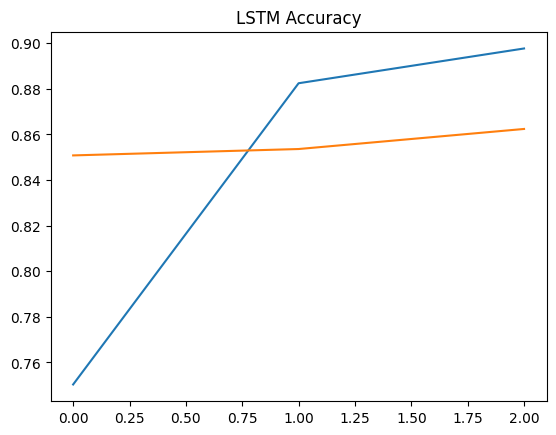

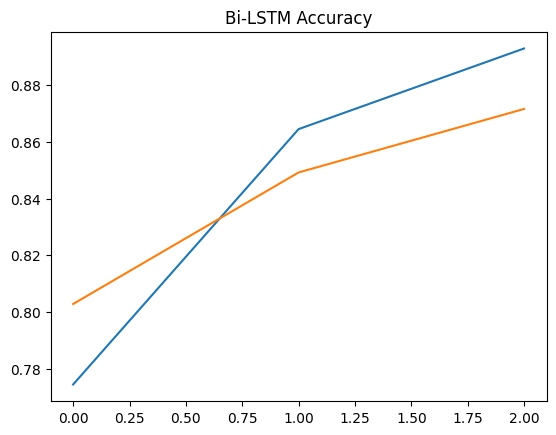

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

model_lstm = Sequential([Embedding(5000, 64), LSTM(128), Dense(1, activation='sigmoid')])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h1 = model_lstm.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

model_bi = Sequential([Embedding(5000, 64), Bidirectional(LSTM(128)), Dense(1, activation='sigmoid')])
model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h2 = model_bi.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

plt.plot(h1.history['accuracy']); plt.plot(h1.history['val_accuracy'])
plt.title("LSTM Accuracy"); plt.show()

plt.plot(h2.history['accuracy']); plt.plot(h2.history['val_accuracy'])
plt.title("Bi Accuracy"); plt.show()


Polynomial Regression (degree=2) RMSE: 5169.68
Polynomial Regression (degree=2) R2 Score: 0.9833


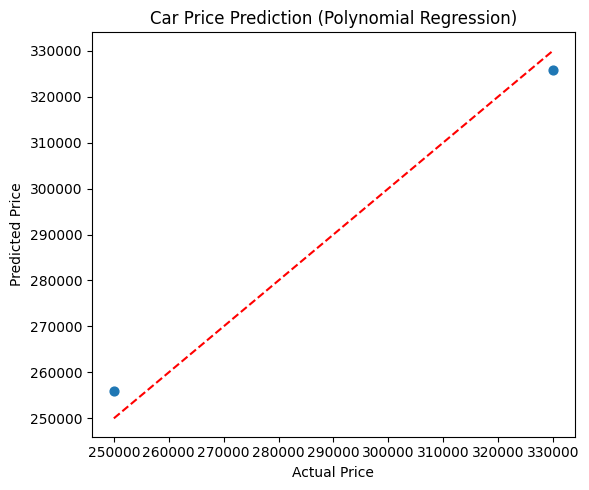

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

data = {
    'mileage':[50000,70000,30000,90000,10000,40000,60000,80000],
    'engine':[1500,1800,1200,2000,1600,1400,1300,1700],
    'age':[5,7,3,9,1,4,6,8],
    'horsepower':[80,100,70,120,90,75,85,110],
    'price':[300000,250000,350000,200000,500000,330000,270000,220000]
}
df = pd.DataFrame(data)

X = df[['mileage','engine','age','horsepower']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Corrected model using PolynomialFeatures and StandardScaler for Polynomial Regression
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Calculate RMSE manually as 'squared' parameter is not universally supported
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f"Polynomial Regression (degree=2) RMSE: {rmse:.2f}")
print(f"Polynomial Regression (degree=2) R2 Score: {r2:.4f}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, pred, s=40)
mn = min(y_test.min(), pred.min())
mx = max(y_test.max(), pred.max())
plt.plot([mn, mx], [mn, mx], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Car Price Prediction (Polynomial Regression)")
plt.tight_layout()
plt.show()

Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.5793 - loss: 0.6563 - val_accuracy: 0.7520 - val_loss: 0.5026
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.6903 - loss: 0.5969 - val_accuracy: 0.6912 - val_loss: 0.5698
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.7711 - loss: 0.4828 - val_accuracy: 0.8204 - val_loss: 0.4394
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8151 - loss: 0.4353
[0.431203156709671, 0.8179200291633606]
Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 145s 405ms/step - accuracy: 0.6991 - loss: 0.5551 - val_accuracy: 0.8388 - val_loss: 0.3796
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 142s 404ms/step - accuracy: 0.8695 - loss: 0.3223 - val_accuracy: 0.8548 - val_loss: 0.3383
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 203s 408ms/step - accuracy: 0.9048 - loss: 0.2404 - val_accuracy: 0.8644 - val_loss: 0.3437
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.8571 - loss: 0.3497
[0.349798321723938, 0.856

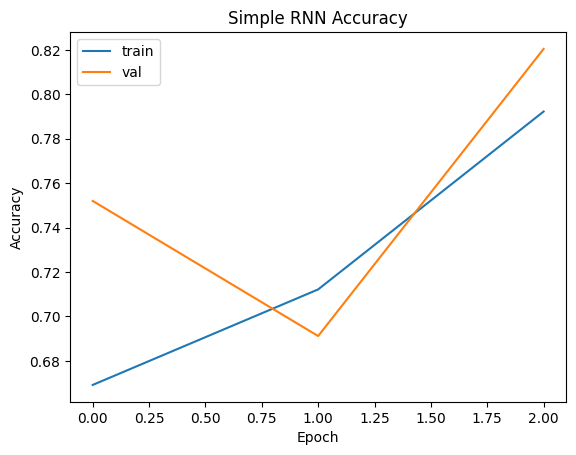

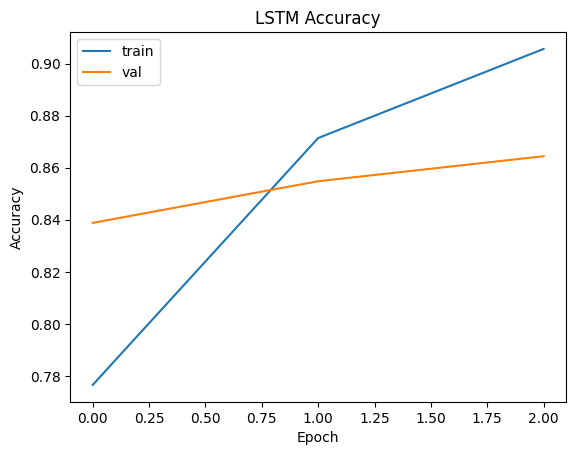

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)
model_rnn = Sequential([
    Embedding(5000, 64),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h_rnn = model_rnn.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)
print(model_rnn.evaluate(x_test, y_test))
model_lstm = Sequential([
    Embedding(5000, 64),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h_lstm = model_lstm.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)
print(model_lstm.evaluate(x_test, y_test))
plt.figure()
plt.plot(h_rnn.history['accuracy'])
plt.plot(h_rnn.history['val_accuracy'])
plt.title("Simple RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()
plt.figure()
plt.plot(h_lstm.history['accuracy'])
plt.plot(h_lstm.history['val_accuracy'])
plt.title("LSTM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()
